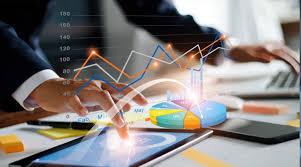
# Introduction

PredCatch Analytics has undertaken a critical project in collaboration with an Australian banking client facing challenges related to fraudulent ATM transactions. The client's profitability and reputation have suffered due to these fraudulent activities, and they are seeking PredCatch's expertise to develop a solution. The primary objective is to reduce and ideally eliminate fraudulent transactions through the creation of a predictive model capable of identifying and preventing such activities in real-time.


As PredCatch's Data Scientist, the initial phase of this project involves building a robust fraud detection and prevention predictive model. The success of this model is pivotal in addressing the client's concerns. In the subsequent phase, if our predictive model proves effective, we will be tasked with presenting and explaining our solution to the client. PredCatch has provided access to the necessary data required for this endeavor.



The challenge at hand lies in the fact that the dataset contains a limited number of fraudulent instances in comparison to the total transactions. To enhance the effectiveness of our solution, additional data related to transaction location (geo_scores), a proprietary index (Lambda_wts), network turn-around times (Qset_tats), and vulnerability qualification score (instance_scores) have also been gathered, though their precise interpretation is not currently required.

In the training data, masked variables are associated with each transaction ID, and our prediction target for this project is 'Target,' where '1' represents fraudulent transactions and '0' represents clean transactions. The success of this project has the potential to significantly impact the client's operational efficiency, security, and reputation within the banking sector.


In [ ]:
# Importing necessary libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
geo_scores = pd.read_csv("Geo_scores.csv")
instance = pd.read_csv("instance_scores.csv")
lambda_wts = pd.read_csv("Lambda_wts.csv")
qset_tats = pd.read_csv("Qset_tats.csv")
test = pd.read_csv("test_share.csv")
train = pd.read_csv("train.csv")

In [ ]:
print(geo_scores.head())
print("****************"*10)
print(instance.head())
print("****************"*10)
print(lambda_wts.head())
print("****************"*10)
print(qset_tats.head())
print("****************"*10)
print(test.head())
print("****************"*10)
print(train.head())
print("****************"*10)

       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
3   48812      -2.41
4  126870       6.55
****************************************************************************************************************************************************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84
****************************************************************************************************************************************************************
     Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83
****************************************************************************************************************************************************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2

In [ ]:
print(geo_scores.shape)
print("****************"*10)
print(instance.shape)
print("****************"*10)
print(lambda_wts.shape)
print("****************"*10)
print(qset_tats.shape)
print("****************"*10)
print(test.shape)
print("****************"*10)
print(train.shape)
print("****************"*10)

(1424035, 2)
****************************************************************************************************************************************************************
(1424035, 2)
****************************************************************************************************************************************************************
(1400, 2)
****************************************************************************************************************************************************************
(1424035, 2)
****************************************************************************************************************************************************************
(56962, 27)
****************************************************************************************************************************************************************
(227845, 28)
*************************************************************************************************************************

In [ ]:
print(geo_scores.isnull().sum())
print("****************"*10)
print(instance.isnull().sum())
print("****************"*10)
print(lambda_wts.isnull().sum())
print("****************"*10)
print(qset_tats.isnull().sum())
print("****************"*10)
print(test.isnull().sum())
print("****************"*10)
print(train.isnull().sum())
print("****************"*10)

id               0
geo_score    71543
dtype: int64
****************************************************************************************************************************************************************
id                 0
instance_scores    0
dtype: int64
****************************************************************************************************************************************************************
Group        0
lambda_wt    0
dtype: int64
****************************************************************************************************************************************************************
id                           0
qsets_normalized_tat    103201
dtype: int64
****************************************************************************************************************************************************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5        

In [ ]:
print(geo_scores.isnull().sum()/len(geo_scores)*100)
print("****************"*10)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.000000
geo_score    5.023964
dtype: float64
****************************************************************************************************************************************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [ ]:
print(geo_scores.info())
print("****************"*10)
print(qset_tats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
****************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [ ]:
print(geo_scores.describe())
print("****************"*10)
print(qset_tats.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
****************************************************************************************************************************************************************
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [ ]:
print(geo_scores.mean())
print("****************"*10)
print(qset_tats.mean())

id           142403.000000
geo_score        -0.000009
dtype: float64
****************************************************************************************************************************************************************
id                      142403.000000
qsets_normalized_tat         0.000011
dtype: float64


In [ ]:
print(geo_scores.median())
print("****************"*10)
print(qset_tats.median())

id           142403.00
geo_score         0.18
dtype: float64
****************************************************************************************************************************************************************
id                      142403.00
qsets_normalized_tat         0.02
dtype: float64


In [ ]:
geo_scores.fillna(0.18, inplace=True)
qset_tats.fillna(0.02, inplace=True)

In [ ]:
print(geo_scores.isnull().sum()/len(geo_scores)*100)
print("****************"*10)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.0
geo_score    0.0
dtype: float64
****************************************************************************************************************************************************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [ ]:
print("geo_scores :", geo_scores['id'].nunique())
print("****************"*10)
print("instance :",instance['id'].nunique())
print("****************"*10)
print("lambda_wts :", lambda_wts["Group"].nunique())
print("****************"*10)
print("qset_tats :", qset_tats['id'].nunique())
print("****************"*10)
print("test id :",test['id'].nunique())
print("****************"*10)
print("test Group:",test['Group'].nunique())
print("****************"*10)
print("train id :", train['id'].nunique())
print("****************"*10)
print("train Group :", train['Group'].nunique())

geo_scores : 284807
****************************************************************************************************************************************************************
instance : 284807
****************************************************************************************************************************************************************
lambda_wts : 1400
****************************************************************************************************************************************************************
qset_tats : 284807
****************************************************************************************************************************************************************
test id : 56962
****************************************************************************************************************************************************************
test Group: 915
****************************************************************************************

In [ ]:
train['data'] = 'train'
test['data'] = 'test'

In [ ]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [ ]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [ ]:
train.shape

(227845, 29)

In [ ]:
test.shape

(56962, 28)

In [ ]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [ ]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [ ]:
# append both train and test data together

In [ ]:
all_data = pd.concat([train, test], axis=0)

In [ ]:
all_data.isnull().sum()

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64

In [ ]:
all_data['id'].nunique()

284807

In [ ]:
print("geo_scores :", geo_scores['id'].nunique())
print("****************"*10)
print("instance :",instance['id'].nunique())
print("****************"*10)
print("lambda_wts :", lambda_wts["Group"].nunique())
print("****************"*10)
print("qset_tats :", qset_tats['id'].nunique())

geo_scores : 284807
****************************************************************************************************************************************************************
instance : 284807
****************************************************************************************************************************************************************
lambda_wts : 1400
****************************************************************************************************************************************************************
qset_tats : 284807


In [ ]:
print("geo_scores :", geo_scores.shape)
print("****************"*10)
print("instance :",instance.shape)
print("****************"*10)
print("lambda_wts :", lambda_wts.shape)
print("****************"*10)
print("qset_tats :", qset_tats.shape)

geo_scores : (1424035, 2)
****************************************************************************************************************************************************************
instance : (1424035, 2)
****************************************************************************************************************************************************************
lambda_wts : (1400, 2)
****************************************************************************************************************************************************************
qset_tats : (1424035, 2)


In [ ]:
print(geo_scores.describe())
print("****************"*10)
print(instance.describe())
print("****************"*10)
print(qset_tats.describe())

                 id     geo_score
count  1.424035e+06  1.424035e+06
mean   1.424030e+05  9.034321e-03
std    8.221673e+04  7.628149e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.170000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.170000e+00
max    2.848060e+05  4.581000e+01
****************************************************************************************************************************************************************
                 id  instance_scores
count  1.424035e+06     1.424035e+06
mean   1.424030e+05    -2.879143e-06
std    8.221673e+04     2.544506e+00
min    0.000000e+00    -1.231900e+02
25%    7.120100e+04    -6.400000e-01
50%    1.424030e+05    -4.000000e-02
75%    2.136050e+05     5.900000e-01
max    2.848060e+05     1.203500e+02
****************************************************************************************************************************************************************
                 id  qsets_normalized_t

In [ ]:
print(geo_scores.max())
print("****************"*10)
print(instance.max())
print("****************"*10)
print(qset_tats.max())

id           284806.00
geo_score        45.81
dtype: float64
****************************************************************************************************************************************************************
id                 284806.00
instance_scores       120.35
dtype: float64
****************************************************************************************************************************************************************
id                      284806.0
qsets_normalized_tat        61.1
dtype: float64


In [ ]:
geo_scores = geo_scores.groupby('id').mean()

In [ ]:
instance = instance.groupby('id').mean()

In [ ]:
qset_tats = qset_tats.groupby('id').mean()

In [ ]:
print("geo_scores :", geo_scores.shape)
print("****************"*10)
print("instance :",instance.shape)
print("****************"*10)
print("lambda_wts :", lambda_wts.shape)
print("****************"*10)
print("qset_tats :", qset_tats.shape)

geo_scores : (284807, 1)
****************************************************************************************************************************************************************
instance : (284807, 1)
****************************************************************************************************************************************************************
lambda_wts : (1400, 2)
****************************************************************************************************************************************************************
qset_tats : (284807, 1)


In [ ]:
geo_scores.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [ ]:
# append geo_scores , instance and qset_tats with all_dataset

all_data = pd.merge(all_data, geo_scores , on='id', how='left')

In [ ]:
all_data = pd.merge(all_data, instance , on='id', how='left')

In [ ]:
all_data = pd.merge(all_data, qset_tats , on='id', how='left')

In [ ]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610
284806,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test,-0.664,1.57,0.354


In [ ]:
all_data['Group'].nunique()

1400

In [ ]:
lambda_wts['Group'].nunique()

1400

In [ ]:
all_data = pd.merge(all_data, lambda_wts , on='Group', how='left')

In [ ]:
all_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010,-0.40
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064,-1.54
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020,0.29
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610,-0.69


In [ ]:
# Split train and test data seperately

train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [ ]:
print(train.shape)
print()
print(test.shape)

(227845, 33)

(56962, 33)


In [ ]:
test.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

In [ ]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [ ]:
test = test.drop(['id', 'Group','Target', 'data'], axis=1)

In [ ]:
test.shape

(56962, 29)

In [ ]:
test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


In [ ]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [ ]:
# split the data into independent and dependent variable

x = train.drop(['id', 'Group','Target', 'data'], axis=1)
y = train[['Target']]

In [ ]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [ ]:
y.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
y.value_counts()

Target
0.0       227451
1.0          394
dtype: int64

In [ ]:
# handle imbalance dataset
import imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101, sampling_strategy=0.75)
x_smote,y_smote = smote.fit_resample(x, y)

In [ ]:
print(x_smote.shape, y_smote.shape)
print()
print(y.value_counts())
print()
print(y_smote.value_counts())

(398039, 29) (398039, 1)

Target
0.0       227451
1.0          394
dtype: int64

Target
0.0       227451
1.0       170588
dtype: int64


In [ ]:
# split the data into train and test for building the model and prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, train_size=0.7,
                                                    random_state=101, stratify=y_smote)

## Building model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9545188088299333
Confusion Matrix : 
[[67131  1104]
 [ 4327 46850]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     68235
         1.0       0.98      0.92      0.95     51177

    accuracy                           0.95    119412
   macro avg       0.96      0.95      0.95    119412
weighted avg       0.96      0.95      0.95    119412



In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9973871972666064
Confusion Matrix : 
[[67923   312]
 [    0 51177]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68235
         1.0       0.99      1.00      1.00     51177

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9974876896794292
Confusion Matrix : 
[[68022   213]
 [   87 51090]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68235
         1.0       1.00      1.00      1.00     51177

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412



In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(x_train, y_train)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.999857635748501
Confusion Matrix : 
[[68220    15]
 [    2 51175]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68235
         1.0       1.00      1.00      1.00     51177

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.9804458513382239
Confusion Matrix : 
[[67758   477]
 [ 1858 49319]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     68235
         1.0       0.99      0.96      0.98     51177

    accuracy                           0.98    119412
   macro avg       0.98      0.98      0.98    119412
weighted avg       0.98      0.98      0.98    119412



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XG Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XG Boost Classifier is : 0.9994389173617392
Confusion Matrix : 
[[68168    67]
 [    0 51177]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68235
         1.0       1.00      1.00      1.00     51177

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412



In [ ]:
#**Feature Scaling is mandatory in Deep neural Network**

## ANN MODEL

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
classifier=Sequential()
# Hidden layer
classifier.add(Dense(input_dim=29,activation='relu',units=50))
# Output layer
classifier.add(Dense(activation="sigmoid",units=1))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1500      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1551 (6.06 KB)
Trainable params: 1551 (6.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
hist=classifier.fit(x_train_sc,y_train,validation_data=(x_test_sc,y_test),batch_size=32,epochs=10)

Epoch 1/10
8708/8708 [==============================] - 46s 5ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 2/10
8708/8708 [==============================] - 38s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 3/10
8708/8708 [==============================] - 34s 4ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 4/10
8708/8708 [==============================] - 38s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 5/10
8708/8708 [==============================] - 36s 4ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 6/10
8708/8708 [==============================] - 35s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 7/10
8708/8708 [==============================] - 41s 5ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0030 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(x_test_sc)
y_pred=(y_pred >0.5)
accuracy_score=accuracy_score(y_test,y_pred)


3732/3732 [==============================] - 10s 3ms/step


In [ ]:
import plotly.express as px

plt.figure(figsize = (12, 6))

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epoch = range(1, 11)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize = (12, 6))

train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epoch = range(1, 11)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

# CONCLUSION:

In conclusion, the PredCatch Analytics team embarked on a mission to combat fraudulent ATM transactions on behalf of our esteemed Australian banking client. The client's profitability and reputation were at stake due to these fraudulent activities, necessitating the development of a predictive model for the detection and prevention of such transactions in real-time.

Throughout this project, we encountered various challenges, with the most notable being the scarcity of fraudulent instances in the dataset. To address this issue and enhance our solution's efficacy, we incorporated additional data related to transaction location, proprietary indices, network turn-around times, and vulnerability qualification scores.



Our journey involved rigorous data preprocessing, model selection, and evaluation. Several machine learning and deep learning models were tested, including Logistic Regression, K-Nearest Neighbors, Decision Trees, Random Forest, Gradient Boosting, and XGBoost. Each model's performance was assessed in terms of accuracy and other relevant metrics.

Ultimately, our analysis revealed that ensemble methods such as Random Forest and XGBoost, as well as deep learning techniques like Artificial Neural Networks (ANNs), demonstrated exceptional predictive capabilities. These models showcased the potential to significantly reduce fraudulent transactions and bolster the client's security measures.

Additionally, it is crucial to highlight the importance of the statistical insights gained during the analysis phase. These insights provided a deeper understanding of the data and aided in feature selection and engineering.



As we conclude this project's initial phase, we look forward to presenting our solution to the client and demonstrating how it can be seamlessly integrated into their operations. The success achieved thus far underscores the power of data science in addressing real-world challenges and underscores the significance of data preprocessing, model selection, and statistical analysis in achieving accurate predictions and fraud prevention.


# Challenges and Lessons Learned:

# Continuous Adaptation:
The fight against fraud is an ongoing battle, and we must remain agile and adaptable to address new tactics employed by fraudsters.

# Data Security:
Protecting sensitive customer data remains paramount, and we must continuously invest in robust security measures to safeguard against breaches.

# Resource Allocation:
Ensuring the availability of adequate resources, both in terms of personnel and technology, is crucial to maintaining our vigilance.